<a href="https://colab.research.google.com/github/maanyakharbanda/Infosys-Internship/blob/main/Time_Series_ARIMA_batter_baller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings # manages warning messages during the code execution
warnings.simplefilter('ignore')

Load data

In [80]:
match_data=pd.read_csv('matches.csv')
match_data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [81]:
match_data.drop('method',axis=1,inplace=True)
match_data.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [82]:
match_data['city']=match_data['city'].fillna(match_data['venue'])
match_data['player_of_match']=match_data['player_of_match'].fillna('unknown')
match_data['winner']=match_data['winner'].fillna('unknown')
match_data['target_runs']=match_data['target_runs'].fillna(0)
match_data['target_overs']=match_data['target_overs'].fillna(0)
match_data['result_margin']=match_data['result_margin'].fillna(0)

In [83]:
match_data.isnull().sum()

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


In [84]:
match_data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah Cricket Stadium',
       'Dubai International Cricket Stadium', 'Rajkot', 'Kanpur',
       'Bengaluru', 'Dubai', 'Sharjah', 'Navi Mumbai', 'Lucknow',
       'Guwahati', 'Mohali'], dtype=object)

In [85]:
match_data.replace("Bengaluru","Banglore",inplace=True)
match_data.replace("Navi Mumbai","Mumbai",inplace=True)
match_data.replace("Abu Dhabi","Dubai",inplace=True)
match_data.replace("Mohali","Chandigarh",inplace=True)

In [86]:
match_data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [87]:
match_data['team1']=match_data['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
match_data['team1']=match_data['team1'].replace('Delhi Daredevils','Delhi Capitals')
match_data['team1']=match_data['team1'].replace('Gujarat Titans','Gujarat Lions')
match_data['team1']=match_data['team1'].replace('Punjab Kings','Kings XI Punjab')
match_data['team1']=match_data['team1'].replace('Pune Warriors','Rising Pune Supergiants')
match_data['team1']=match_data['team1'].replace('Royal Challengers Bengaluru','Royal Challengers Banglore')
match_data['team1']=match_data['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [88]:
match_data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [89]:
match_data['team2']=match_data['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
match_data['team2']=match_data['team2'].replace('Delhi Daredevils','Delhi Capitals')
match_data['team2']=match_data['team2'].replace('Gujarat Titans','Gujarat Lions')
match_data['team2']=match_data['team2'].replace('Punjab Kings','Kings XI Punjab')
match_data['team2']=match_data['team2'].replace('Pune Warriors','Rising Pune Supergiants')
match_data['team2']=match_data['team2'].replace('Royal Challengers Bengaluru','Royal Challengers Banglore')
match_data['team2']=match_data['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [90]:
match_data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [91]:
match_data.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
match_data.replace('Brabourne Stadium, Mumbai','Brabourne Stadium')
match_data.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
match_data.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
match_data.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium',inplace=True)
match_data.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy',inplace=True)
match_data.replace('Eden Gardens, Kolkata','Eden Gardens',inplace=True)
match_data.replace('Wankhede Stadium, Mumbai','Wankhede Stadium',inplace=True)
match_data.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
match_data.replace('Zayed Cricket Stadium, Abu Dhabi','Sheikh Zayed Stadium',inplace=True)
match_data.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace=True)
match_data.replace('MA Chidambaram Stadium, Chepauk, Chennai, Chepauk','MA Chidambaram Stadium',inplace=True)
match_data.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium',inplace=True)
match_data.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium',inplace=True)
match_data.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)
match_data.replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium',inplace=True)
match_data.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium',inplace=True)
match_data.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium',inplace=True)
match_data.replace('Himachal Pradesh Cricket Association Stadium, Dharamsala','Himachal Pradesh Cricket Association Stadium',inplace=True)
match_data.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',inplace=True)
match_data.replace('Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur','Maharaja Yadavindra Singh International Cricket Stadium',inplace=True)
match_data.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
match_data.replace('Barsapara Cricket Stadium, Guwahati','Barsapara Cricket Stadium',inplace=True)

In [92]:
match_data

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Rajiv Gandhi International Stadium,Kings XI Punjab,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Banglore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


In [93]:
print(match_data.venue.nunique())
print(match_data.team1.nunique())
print(match_data.team2.nunique())
print(match_data.city.nunique())

42
13
13
35


In [94]:
print(match_data['date'].dtype)

object


As here the date column is represented as strings so we will convert it into datetime

In [95]:
match_data['date']=pd.to_datetime(match_data['date'])

In [96]:
print(match_data['date'].dtype)

datetime64[ns]


In [97]:
match_data.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


reshape and calculate the team metrics

In [98]:
team_performance=match_data.melt(
    id_vars=["id","season","date","winner","result","result_margin","target_runs"],
    value_vars=["team1","team2"],
    var_name="home_or_away",
    value_name="team"
)
team_performance["is_winner"]=(team_performance["team"]==team_performance["winner"]).astype(int)
team_performance["runs_scored"]=team_performance["target_runs"]
team_performance["runs_conceded"]=team_performance.groupby("id")["target_runs"].transform("sum")-team_performance["target_runs"]
team_performance.head()

,id,season,date,winner,result,result_margin,target_runs,home_or_away,team,is_winner,runs_scored,runs_conceded
0,335982,2007/08,2008-04-18,Kolkata Knight Riders,runs,140.0,223.0,team1,Royal Challengers Bangalore,0,223.0,223.0
1,335983,2007/08,2008-04-19,Chennai Super Kings,runs,33.0,241.0,team1,Kings XI Punjab,0,241.0,241.0
2,335984,2007/08,2008-04-19,Delhi Daredevils,wickets,9.0,130.0,team1,Delhi Capitals,0,130.0,130.0
3,335985,2007/08,2008-04-20,Royal Challengers Bangalore,wickets,5.0,166.0,team1,Mumbai Indians,0,166.0,166.0
4,335986,2007/08,2008-04-20,Kolkata Knight Riders,wickets,5.0,111.0,team1,Kolkata Knight Riders,1,111.0,111.0


In [99]:
team_performance_agg = team_performance.groupby(["team" ,"date"]).agg({
    "is_winner":"sum",
    "runs_scored":"sum",
    "runs_conceded":"sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] =team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]
team_performance_agg

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
0,Royal Challengers Bangalore,2008-04-18,0,223.0,223.0,0.0
1,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
2,Chennai Super Kings,2008-04-19,1,241.0,241.0,0.0
3,Rajasthan Royals,2008-04-19,0,130.0,130.0,0.0
4,Kings XI Punjab,2008-04-19,0,241.0,241.0,0.0
...,...,...,...,...,...,...
2185,Royal Challengers Banglore,2024-05-22,0,173.0,173.0,0.0
2186,Rajasthan Royals,2024-05-24,0,176.0,176.0,0.0
2187,Sunrisers Hyderabad,2024-05-24,1,176.0,176.0,0.0
2188,Kolkata Knight Riders,2024-05-26,1,114.0,114.0,0.0


In [104]:
team_name=input("Enter the team name: ")
team_data=team_performance_agg[team_performance_agg['team']==team_name]
team_data

Enter the team name: Kolkata Knight riders


,team,date,is_winner,runs_scored,runs_conceded,net_run_rate


In [105]:
team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] ==team_name]
team_data

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
1,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
8,Kolkata Knight Riders,2008-04-20,1,111.0,111.0,0.0
22,Kolkata Knight Riders,2008-04-26,0,148.0,148.0,0.0
31,Kolkata Knight Riders,2008-04-29,0,138.0,138.0,0.0
35,Kolkata Knight Riders,2008-05-01,0,197.0,197.0,0.0
...,...,...,...,...,...,...
2149,Kolkata Knight Riders,2024-05-03,1,170.0,170.0,0.0
2152,Kolkata Knight Riders,2024-05-05,1,236.0,236.0,0.0
2166,Kolkata Knight Riders,2024-05-11,1,158.0,158.0,0.0
2182,Kolkata Knight Riders,2024-05-21,1,160.0,160.0,0.0


In [106]:
team_data=team_data.sort_values('date')
team_data.set_index('date',inplace=True)
team_data

,team,is_winner,runs_scored,runs_conceded,net_run_rate
date,,,,,
2008-04-18,Kolkata Knight Riders,1,223.0,223.0,0.0
2008-04-20,Kolkata Knight Riders,1,111.0,111.0,0.0
2008-04-26,Kolkata Knight Riders,0,148.0,148.0,0.0
2008-04-29,Kolkata Knight Riders,0,138.0,138.0,0.0
2008-05-01,Kolkata Knight Riders,0,197.0,197.0,0.0
...,...,...,...,...,...
2024-05-03,Kolkata Knight Riders,1,170.0,170.0,0.0
2024-05-05,Kolkata Knight Riders,1,236.0,236.0,0.0
2024-05-11,Kolkata Knight Riders,1,158.0,158.0,0.0


In [107]:
#stationary check
time_series=team_data['runs_scored']
adf_result=adfuller(time_series)
print("ADF statistic", adf_result[0])
print("p value", adf_result[1])
if adf_result[1]>0.05:
  print("not stationary")

ADF statistic -7.214074913565808
p value 2.1963196715516396e-10


Differencing (if necessary): If the ADF test's p-value is greater than 0.05,
it suggests the time series is not stationary.
The code then calculates the first difference of the time series (time_series_diff) to make it stationary.
Differencing subtracts the previous value from the current value.

In [108]:
if adf_result[1]>0.05:
  time_series_dif=time_series.diff().dropna()
else:
  time_series_dif=time_series

In [109]:
train_size=int(len(time_series_dif)*0.8)
train,test=time_series_dif[:train_size],time_series_dif[train_size:]

In [110]:
model=ARIMA(train,order=(1,1,1)) #(1,1,1) performance ----- 10 matches he is getting more score in first 8 but not in last 2 back
fitted_model=model.fit()

In [111]:
forecast=fitted_model.forecast(steps=len(test))
forecast.index=test.index
forecast.head(5)


,predicted_mean
date,
2021-09-23,160.975878
2021-09-26,166.173245
2021-09-28,166.570630
2021-10-01,166.601014
2021-10-03,166.603337


In [112]:
actual_runs=test.values
forecast_runs=forecast.values
mae=np.mean(np.abs(actual_runs-forecast_runs))
print("Mean absolute error",mae)
rmse=np.sqrt(np.mean((actual_runs-forecast_runs)**2))
print("Root mean squared error",rmse)

Mean absolute error 28.84228337144472
Root mean squared error 37.5213765172496


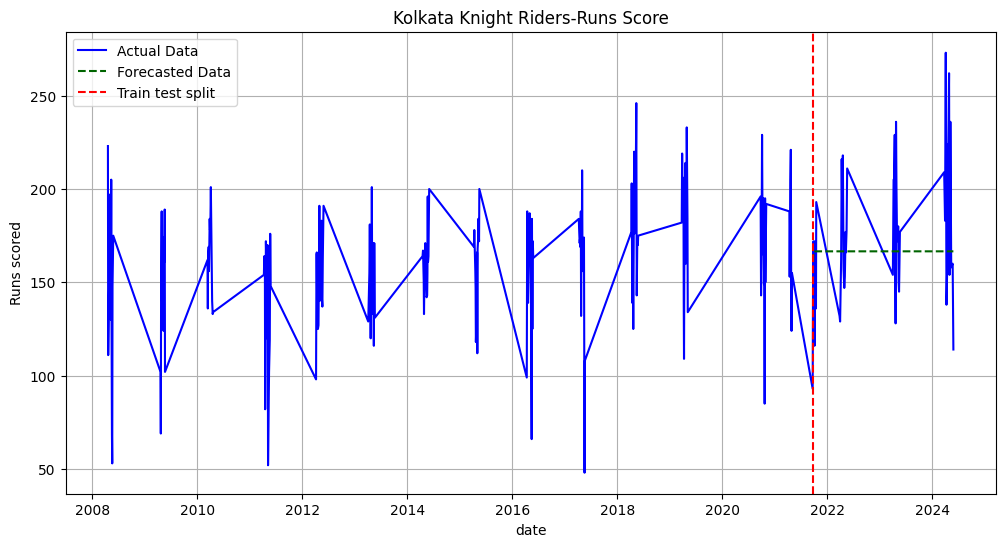

In [113]:
plt.figure(figsize=(12,6))
plt.plot(time_series_dif,label="Actual Data",color='blue')
plt.plot(forecast,label="Forecasted Data",color='darkgreen',linestyle="--")
plt.axvline(x=test.index[0],color='red',linestyle="--",label="Train test split")
plt.title(f"{team_name}-Runs Score")
plt.xlabel("date")
plt.ylabel("Runs scored")
plt.legend()
plt.grid()

In [ ]:
deliveries_data=pd.read_csv('deliveries.csv')

In [ ]:
deliveries_data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
deliveries_data.batter.unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [ ]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Gujarat Titans','Gujarat Lions')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Punjab Kings','Kings XI Punjab')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Pune Warriors','Rising Pune Supergiants')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Royal Challengers Bengaluru','Royal Challengers Banglore')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Gujarat Titans','Gujarat Lions')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Punjab Kings','Kings XI Punjab')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Pune Warriors','Rising Pune Supergiants')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Royal Challengers Bengaluru','Royal Challengers Banglore')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
deliveries_data.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [114]:
kohli_scores=deliveries_data[deliveries_data['batter']=='V Kohli']
kohli_matchwise_scores=kohli_scores.groupby('match_id')['batsman_runs'].sum().reset_index()
kohli_matchwise_scores_subset=kohli_matchwise_scores.head(239)
kohli_matchwise_scores_subset

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
234,1426263,3
235,1426268,42
236,1426274,18
237,1426279,51


In [115]:
kohli_matchwise_scores_subset["match_number"]=range(len(kohli_matchwise_scores_subset))
kohli_matchwise_scores_subset.set_index("match_number",inplace=True)

In [116]:
model=ARIMA(kohli_matchwise_scores_subset["batsman_runs"],order=(1,1,1))
model_fitted=model.fit()

In [117]:
forecast=model_fitted.forecast(steps=5)
#steps indicate the next 5 matches
forecast

,predicted_mean
239,45.064196
240,44.510021
241,44.497705
242,44.497431
243,44.497425


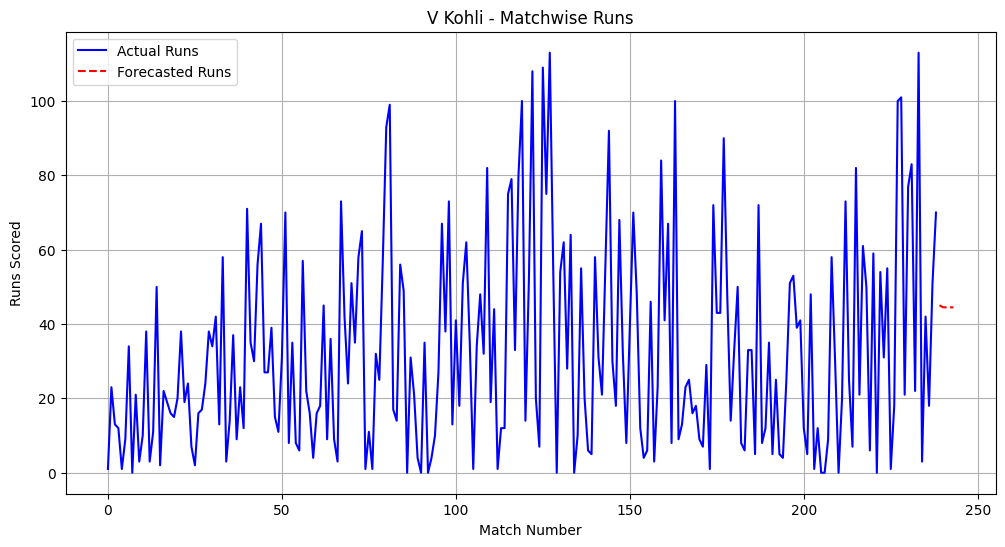

In [118]:
# Displaying the results for Kohli
plt.figure(figsize=(12, 6))
plt.plot(kohli_matchwise_scores_subset["batsman_runs"], label="Actual Runs", color="blue")
plt.plot(forecast, label="Forecasted Runs", color="red", linestyle="--")
plt.title("V Kohli - Matchwise Runs")
plt.xlabel("Match Number")
plt.ylabel("Runs Scored")
plt.legend()
plt.grid(True)
plt.show()

In [120]:
# runs per batsman and match
batsman_scores=deliveries_data.groupby(['match_id','batter']).agg({'batsman_runs':'sum'}).reset_index()

# total runs per batsman
total_runs_per_batsman=batsman_scores.groupby('batter')['batsman_runs'].sum().reset_index()
total_runs_per_batsman=total_runs_per_batsman.sort_values('batsman_runs',ascending=False)

# top 10 batsman
top_10_batsmen=total_runs_per_batsman.head(10)
top_10_batsmen

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


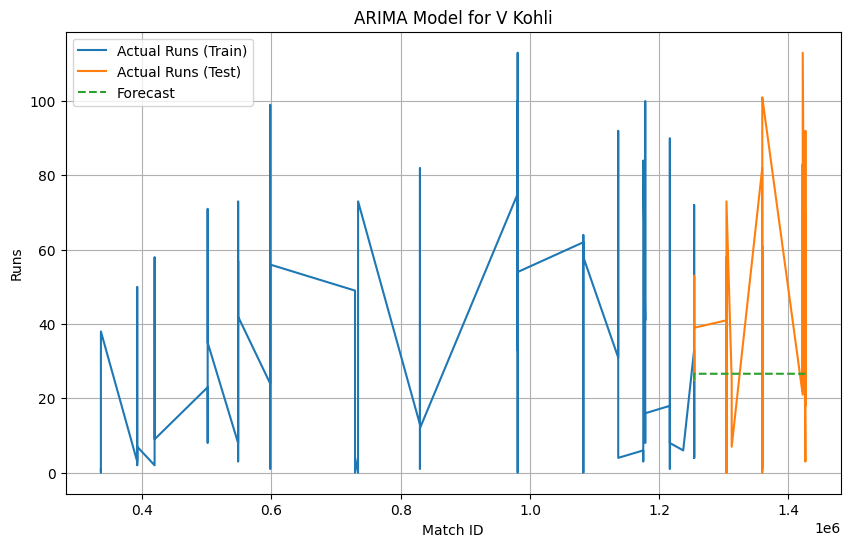

Batsman: V Kohli, MAE: 25.49455584853502


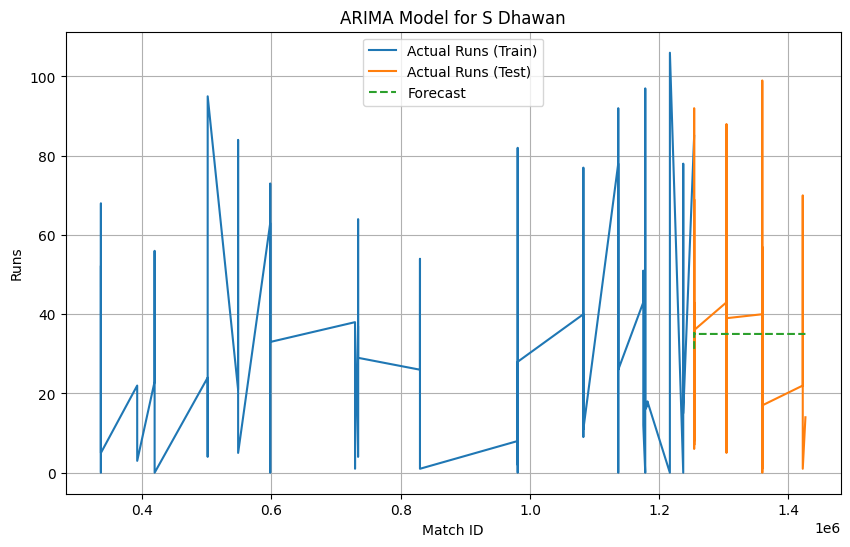

Batsman: S Dhawan, MAE: 21.69183992169749


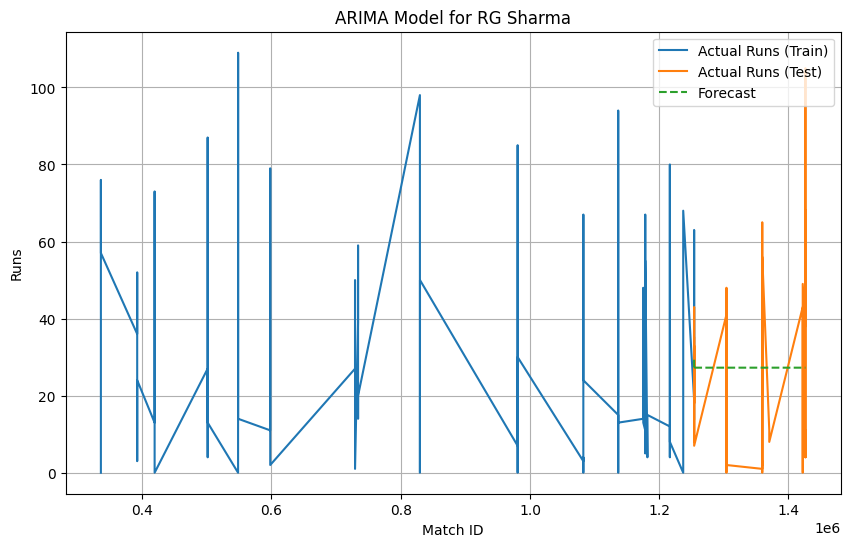

Batsman: RG Sharma, MAE: 18.246250065380263


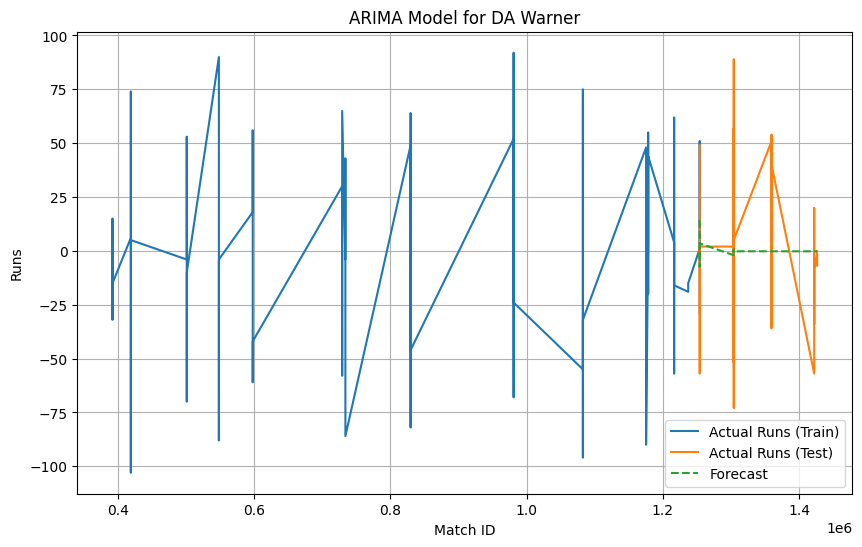

Batsman: DA Warner, MAE: 27.299710037045507


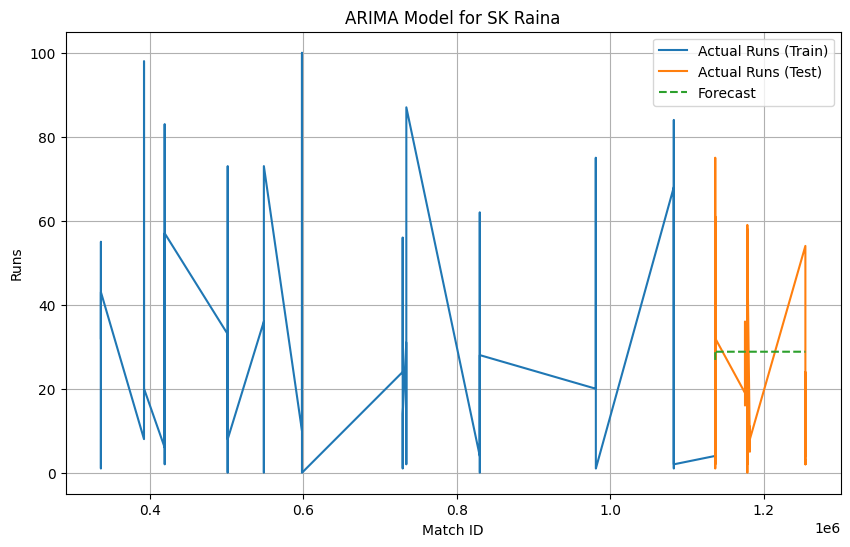

Batsman: SK Raina, MAE: 18.688334116662833


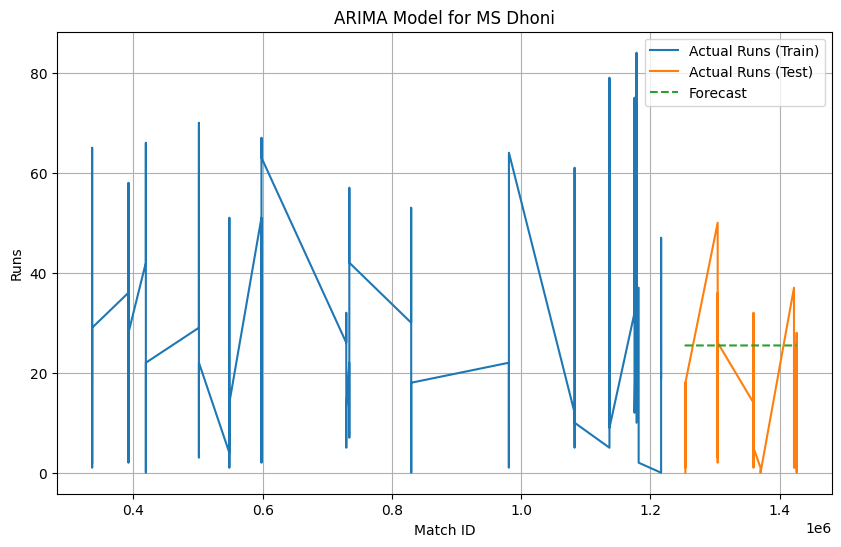

Batsman: MS Dhoni, MAE: 14.75263423907063


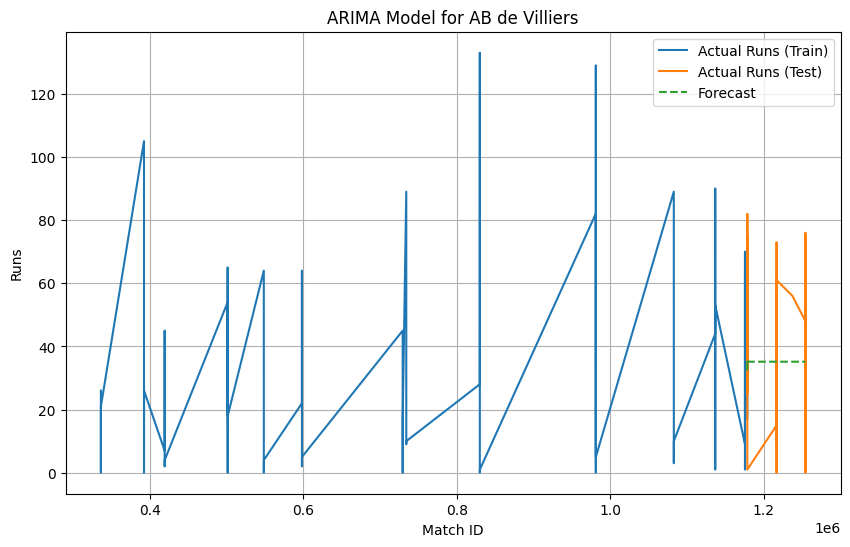

Batsman: AB de Villiers, MAE: 24.237999661757524


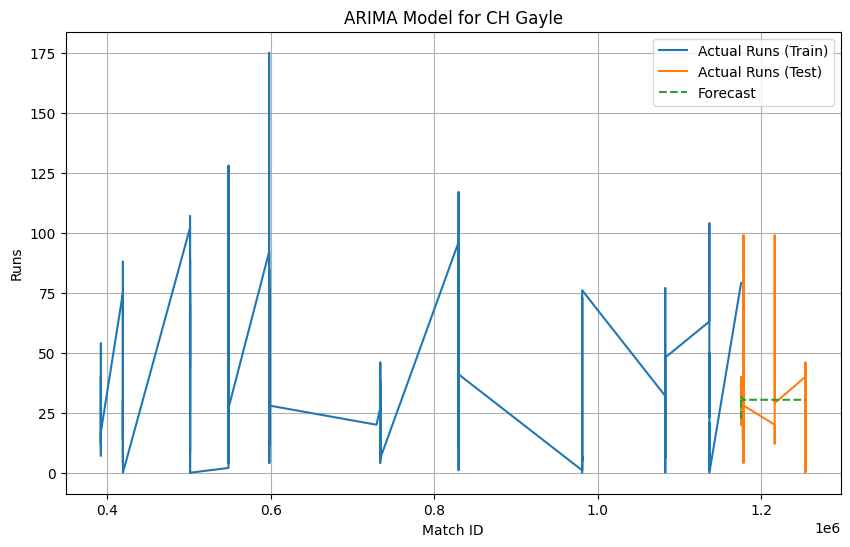

Batsman: CH Gayle, MAE: 19.733679311667377


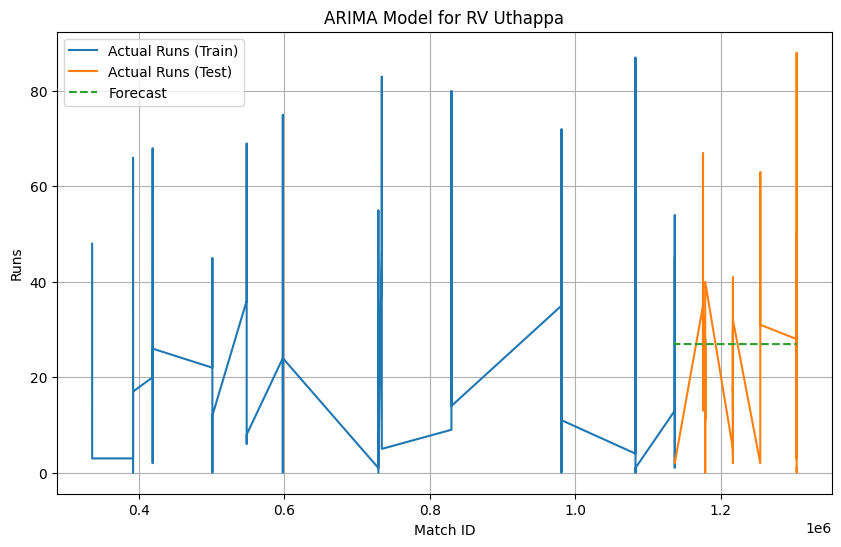

Batsman: RV Uthappa, MAE: 17.147227034929195


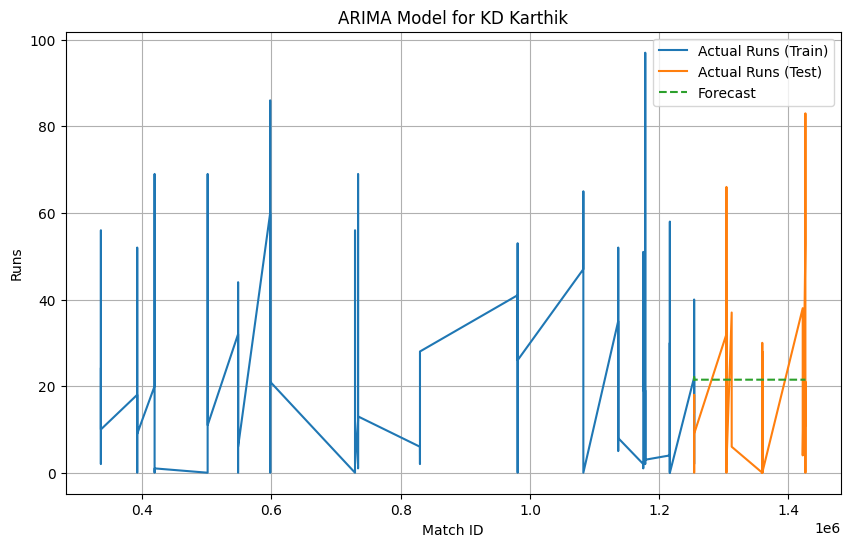

Batsman: KD Karthik, MAE: 14.277295724712504


In [121]:
for i in range(len(top_10_batsmen)):
    batsman_name = top_10_batsmen.iloc[i]['batter']
    batsman_data = batsman_scores[batsman_scores['batter'] == batsman_name].set_index('match_id')['batsman_runs']

    # Stationarity Check
    adf_result = adfuller(batsman_data)
    if adf_result[1] > 0.05:
        batsman_data = batsman_data.diff().dropna()

    # Split data
    train_size = int(len(batsman_data) * 0.8)
    train, test = batsman_data[:train_size], batsman_data[train_size:]

    # ARIMA model
    try:
        model = ARIMA(train, order=(1, 1, 1))  # Adjust order if needed
        fitted_model = model.fit()
        forecast = fitted_model.forecast(steps=len(test))
        forecast.index = test.index

        # Create the plot
        plt.figure(figsize=(10, 6))
        plt.plot(train, label='Actual Runs (Train)')
        plt.plot(test, label='Actual Runs (Test)')
        plt.plot(forecast, label='Forecast', linestyle='--')
        plt.title(f'ARIMA Model for {batsman_name}')
        plt.xlabel('Match ID')
        plt.ylabel('Runs')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Evaluation metrics
        mae = np.mean(np.abs(test.values - forecast.values))
        print(f"Batsman: {batsman_name}, MAE: {mae}")

    except Exception as e:
        print(f"Error fitting ARIMA model for {batsman_name}: {e}")

Text(0, 0.5, 'scores')

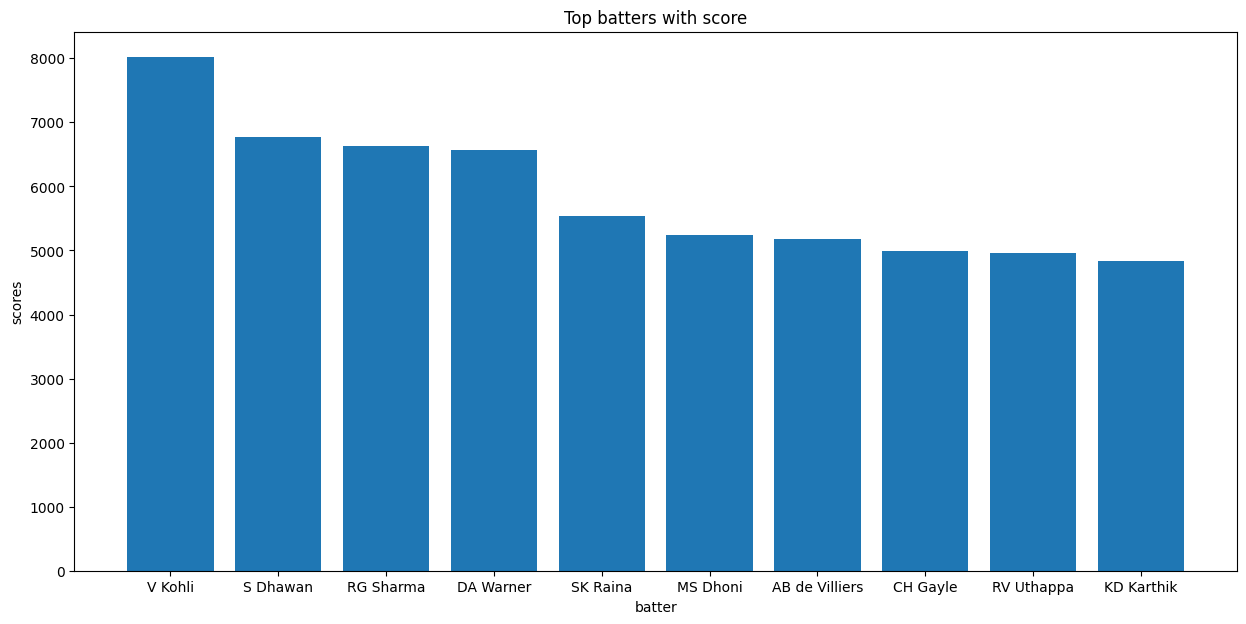

In [122]:
player=top_batter_scores['batter']
scores=top_batter_scores['batsman_runs']
fig = plt.figure(figsize = (15,7))
plt.bar(player,scores)
plt.title('Top batters with score')
plt.xlabel('batter')
plt.ylabel('scores')

In [123]:
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  #preparing data
  top_batter_score=score.head(239)
  top_batter_score["match_number"]=range(len(top_batter_score))
  top_batter_score.set_index("match_number",inplace=True)
  model=ARIMA(top_batter_score["batsman_runs"],order=(1,1,1))
  model_fit=model.fit()
  forecast=model_fit.forecast(steps=5)
  print(forecast)

V Kohli
239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64
S Dhawan
221    34.077027
222    32.753423
223    32.840684
224    32.834931
225    32.835310
Name: predicted_mean, dtype: float64
RG Sharma
239    26.263767
240    26.226524
241    26.231782
242    26.231040
243    26.231145
Name: predicted_mean, dtype: float64
DA Warner
184    30.375157
185    29.294774
186    29.334510
187    29.333048
188    29.333102
Name: predicted_mean, dtype: float64
SK Raina
200    26.396030
201    25.281171
202    25.413451
203    25.397756
204    25.399618
Name: predicted_mean, dtype: float64
MS Dhoni
228    14.177092
229    14.334177
230    14.331897
231    14.331930
232    14.331929
Name: predicted_mean, dtype: float64
AB de Villiers
170    32.171063
171    30.361837
172    30.516449
173    30.503236
174    30.504366
Name: predicted_mean, dtype: float64
CH Gayle
141    31.122217
142    29.325195
143    29.513797
144    29.494003

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for i in range(len(top_batter_scores)):
    batsman = top_batter_scores.iloc[i]["batter"]
    print(f"Batsman: {batsman}")
    score = batter[batter['batter'] == batsman]

    # Preparing data
    score["match_number"] = range(len(score))
    score.set_index("match_number", inplace=True)

    # Splitting into train and test sets
    train_size = int(len(score) * 0.8)  # 80% train, 20% test
    train, test = score["batsman_runs"][:train_size], score["batsman_runs"][train_size:]

    # Fitting the ARIMA model
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting for test set
    test_forecast = model_fit.forecast(steps=len(test))

    # Forecasting beyond the dataset
    future_forecast = model_fit.forecast(steps=5)

    # Evaluation metrics
    mae = mean_absolute_error(test, test_forecast)
    mse = mean_squared_error(test, test_forecast)
    rmse = np.sqrt(mse)

    # Display results
    print("Future Forecasted Values (Next 5 Matches):")
    print(future_forecast)
    print("Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 50)


Batsman: V Kohli
Future Forecasted Values (Next 5 Matches):
195    24.903255
196    26.494555
197    26.615696
198    26.624918
199    26.625620
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 25.49
Mean Squared Error (MSE): 1049.98
Root Mean Squared Error (RMSE): 32.40
--------------------------------------------------
Batsman: S Dhawan
Future Forecasted Values (Next 5 Matches):
176    31.254979
177    35.307288
178    35.001749
179    35.024786
180    35.023049
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 21.69
Mean Squared Error (MSE): 701.30
Root Mean Squared Error (RMSE): 26.48
--------------------------------------------------
Batsman: RG Sharma
Future Forecasted Values (Next 5 Matches):
200    29.323259
201    26.941564
202    27.311751
203    27.254213
204    27.263156
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 18.25
Mean Squared Error (MSE): 491.34
Root Mean Squa

In [ ]:
#preparing data
dhoni=deliveries_data[deliveries_data.batter=="MS Dhoni"]
dhoni_score=dhoni.groupby('match_id')['batsman_runs'].sum().reset_index()
print(dhoni_score)
dhoni_score_sub=dhoni_score.head(239)
dhoni_score_sub
dhoni_score_sub["match_number"]=range(len(dhoni_score_sub))
dhoni_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_subset["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

     match_id  batsman_runs
0      335983             2
1      335989            30
2      335993            43
3      335996            65
4      336001            32
..        ...           ...
223   1426284             5
224   1426287            14
225   1426291             0
226   1426297            26
227   1426306            25

[228 rows x 2 columns]
239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


Bowlers

In [127]:
# Preprocess data to calculate bowling performance metrics
bowler_data=deliveries_data[['match_id', 'bowler', 'is_wicket', 'total_runs']]

In [138]:
# Aggregate data by match and bowler
performance=bowler_data.groupby(['match_id','bowler']).agg(
    wickets=('is_wicket','sum'),  # Total wickets per match
    runs_conceded=('total_runs','sum')  # Total runs conceded per match
).reset_index()

In [139]:
# Aggregate performance metrics for each bowler across matches
bowler_summary = performance.groupby('bowler').agg(
    total_wickets=('wickets', 'sum'),
    total_runs_conceded=('runs_conceded', 'sum'),
    matches_played=('match_id', 'nunique')
).reset_index()

In [140]:
bowler_summary['average_runs_conceded'] = bowler_summary['total_runs_conceded'] / bowler_summary['matches_played']
bowler_summary['wickets_per_match'] = bowler_summary['total_wickets'] / bowler_summary['matches_played']

In [143]:
# Sort bowlers by total wickets and select the top 10
top_bowlers = bowler_summary.sort_values(by='total_wickets', ascending=False).head(10)
top_bowlers

,bowler,total_wickets,total_runs_conceded,matches_played,average_runs_conceded,wickets_per_match
524,YS Chahal,213,4681,159,29.440252,1.339623
119,DJ Bravo,207,4436,158,28.075949,1.310127
348,PP Chawla,201,5179,191,27.115183,1.052356
446,SP Narine,200,4672,175,26.697143,1.142857
355,R Ashwin,198,5435,208,26.129808,0.951923
71,B Kumar,195,5051,176,28.698864,1.107955
438,SL Malinga,188,3486,122,28.573770,1.540984
8,A Mishra,183,4193,162,25.882716,1.129630
193,JJ Bumrah,182,3840,133,28.872180,1.368421
373,RA Jadeja,169,4917,211,23.303318,0.800948


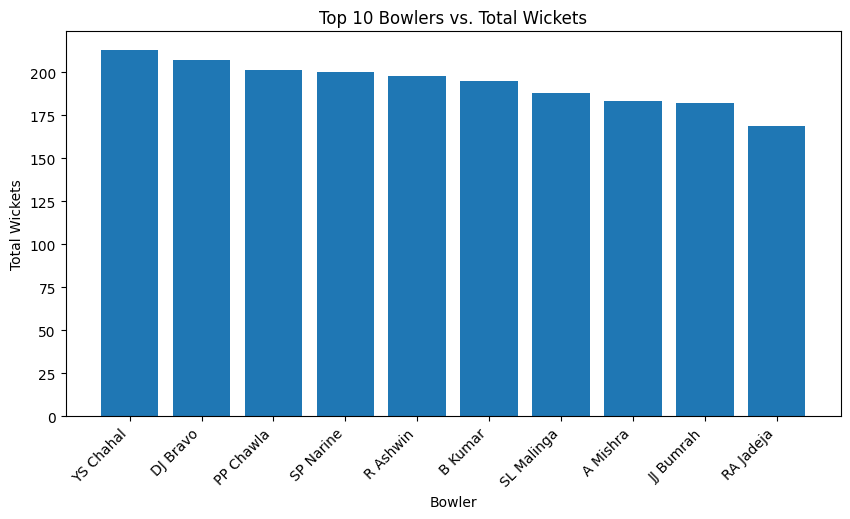

In [144]:
plt.figure(figsize=(10, 5))
plt.bar(top_bowlers['bowler'], top_bowlers['total_wickets'])
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.title("Top 10 Bowlers vs. Total Wickets")
plt.xticks(rotation=45, ha='right')
plt.show()

In [145]:
# Choose a bowler to analyze
top_bowler='YS Chahal'
bowler_timeseries=performance[performance['bowler'] == top_bowler].set_index('match_id')['wickets']
print(bowler_timeseries)
# Sort the series by match_id (to ensure chronological order)
bowler_timeseries=bowler_timeseries.sort_index()

match_id
598029     0
729281     1
729287     2
729299     1
729305     1
          ..
1426294    1
1426299    1
1426303    2
1426310    1
1426311    0
Name: wickets, Length: 159, dtype: int64


In [146]:
# Train an ARIMA model on the bowler's wickets per match
model=ARIMA(bowler_timeseries, order=(2, 1, 2))  # ARIMA(p=2, d=1, q=2)
model_fit=model.fit()

In [147]:

# Forecast wickets for the next 10 matches
forecast_steps=10
forecast=model_fit.forecast(steps=forecast_steps)

In [148]:
print(forecast)

159    1.005454
160    1.437802
161    1.202628
162    1.464834
163    1.206342
164    1.465336
165    1.206418
166    1.465339
167    1.206425
168    1.465333
Name: predicted_mean, dtype: float64


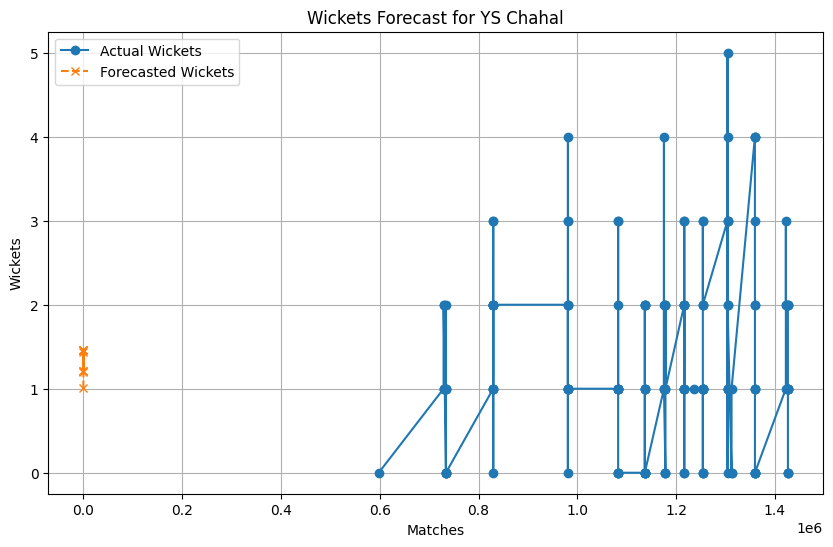

In [149]:
# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(bowler_timeseries, label='Actual Wickets', marker='o')
plt.plot(range(len(bowler_timeseries), len(bowler_timeseries) + forecast_steps), forecast, label='Forecasted Wickets', marker='x', linestyle='--')
plt.title(f'Wickets Forecast for {top_bowler}')
plt.xlabel('Matches')
plt.ylabel('Wickets')
plt.legend()
plt.grid(True)
plt.show()

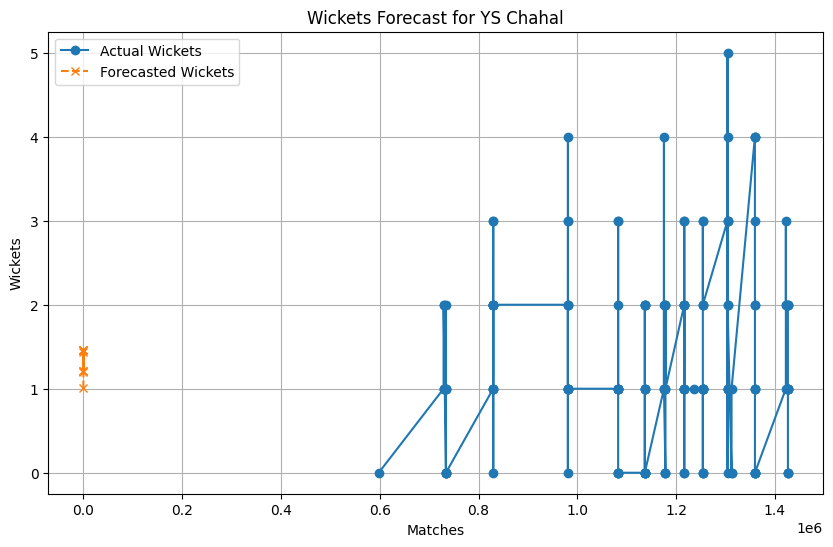

Forecasted wickets for YS Chahal in the next 10 matches:
159    1.005454
160    1.437802
161    1.202628
162    1.464834
163    1.206342
164    1.465336
165    1.206418
166    1.465339
167    1.206425
168    1.465333
Name: predicted_mean, dtype: float64


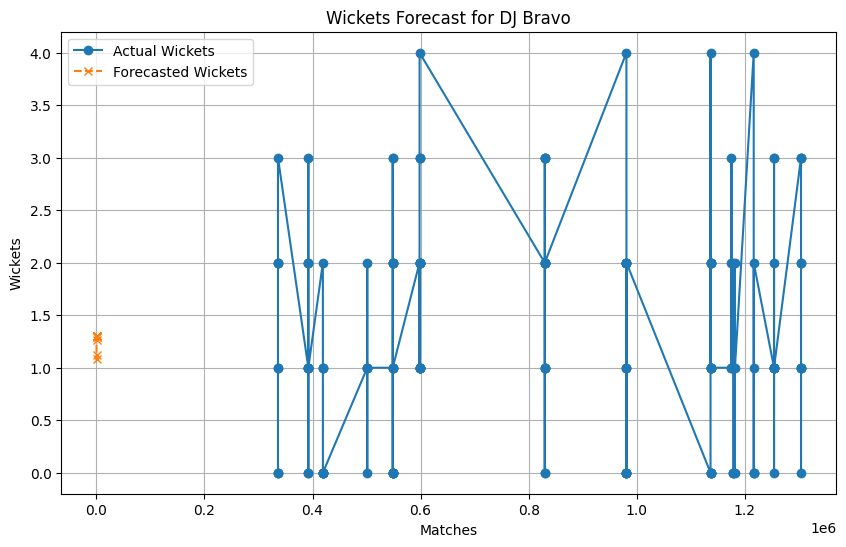

Forecasted wickets for DJ Bravo in the next 10 matches:
158    1.123336
159    1.080509
160    1.290551
161    1.263417
162    1.304446
163    1.295703
164    1.304033
165    1.301664
166    1.303410
167    1.302815
Name: predicted_mean, dtype: float64


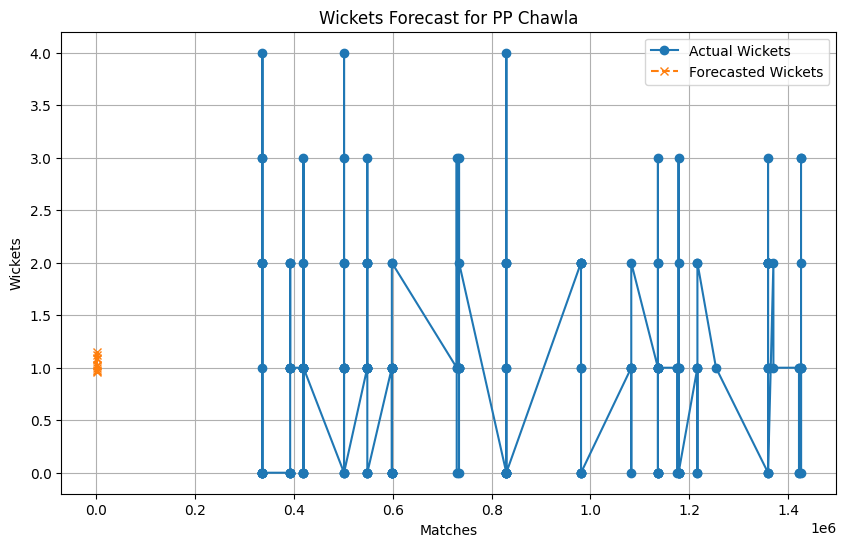

Forecasted wickets for PP Chawla in the next 10 matches:
191    0.976358
192    0.955228
193    1.148731
194    0.972775
195    1.117782
196    0.999699
197    1.095708
198    1.017662
199    1.081105
200    1.029533
Name: predicted_mean, dtype: float64


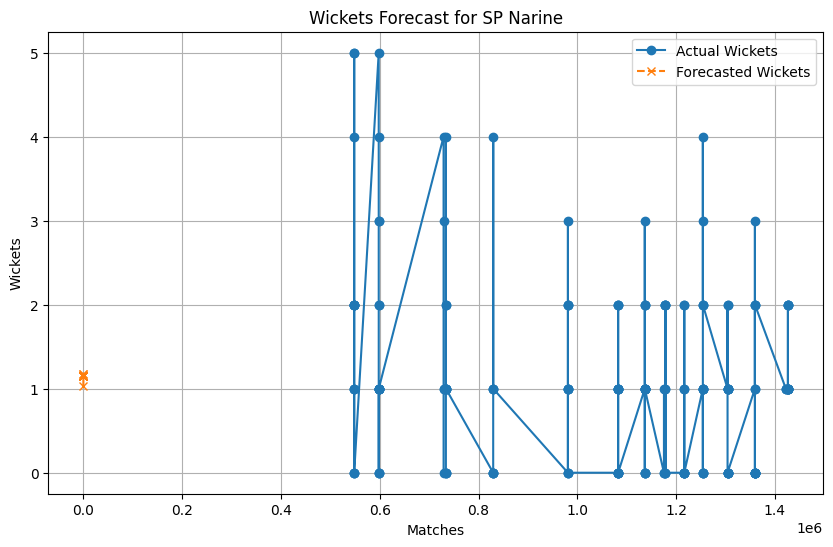

Forecasted wickets for SP Narine in the next 10 matches:
175    1.036566
176    1.181101
177    1.173002
178    1.151011
179    1.152631
180    1.155970
181    1.155665
182    1.155158
183    1.155214
184    1.155291
Name: predicted_mean, dtype: float64


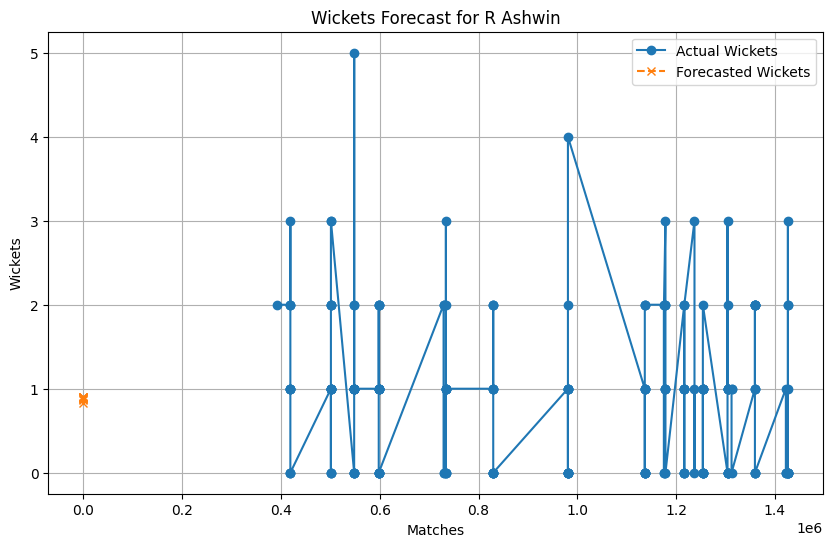

Forecasted wickets for R Ashwin in the next 10 matches:
208    0.829370
209    0.864865
210    0.906687
211    0.877625
212    0.903352
213    0.881240
214    0.900307
215    0.883871
216    0.898039
217    0.885826
Name: predicted_mean, dtype: float64


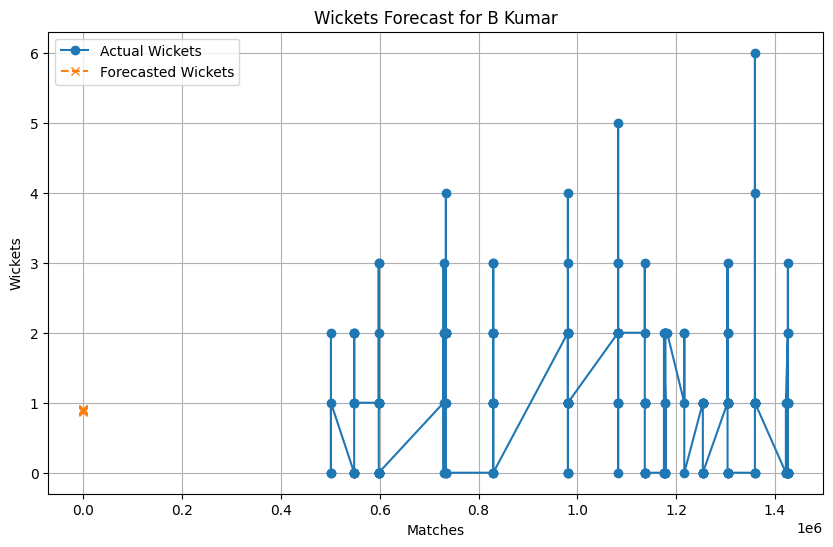

Forecasted wickets for B Kumar in the next 10 matches:
176    0.877525
177    0.874279
178    0.911221
179    0.883362
180    0.905728
181    0.887843
182    0.902148
183    0.890706
184    0.899858
185    0.892538
Name: predicted_mean, dtype: float64


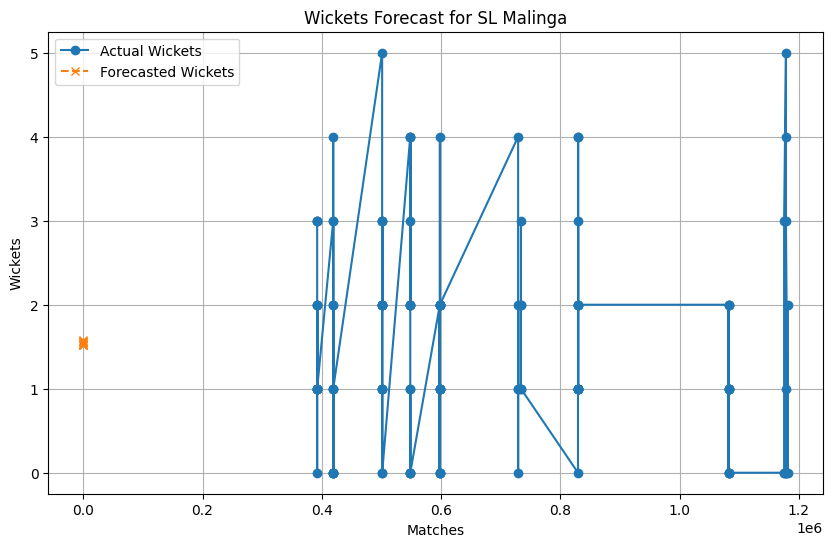

Forecasted wickets for SL Malinga in the next 10 matches:
122    1.581432
123    1.518914
124    1.564134
125    1.522899
126    1.560225
127    1.526430
128    1.557028
129    1.529325
130    1.554407
131    1.531698
Name: predicted_mean, dtype: float64


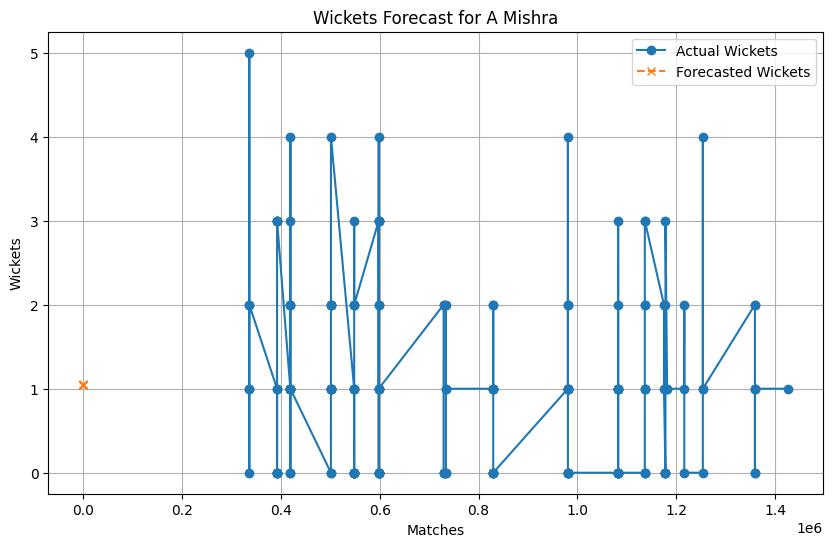

Forecasted wickets for A Mishra in the next 10 matches:
162    1.045904
163    1.048600
164    1.050283
165    1.050112
166    1.050221
167    1.050194
168    1.050204
169    1.050201
170    1.050202
171    1.050201
Name: predicted_mean, dtype: float64


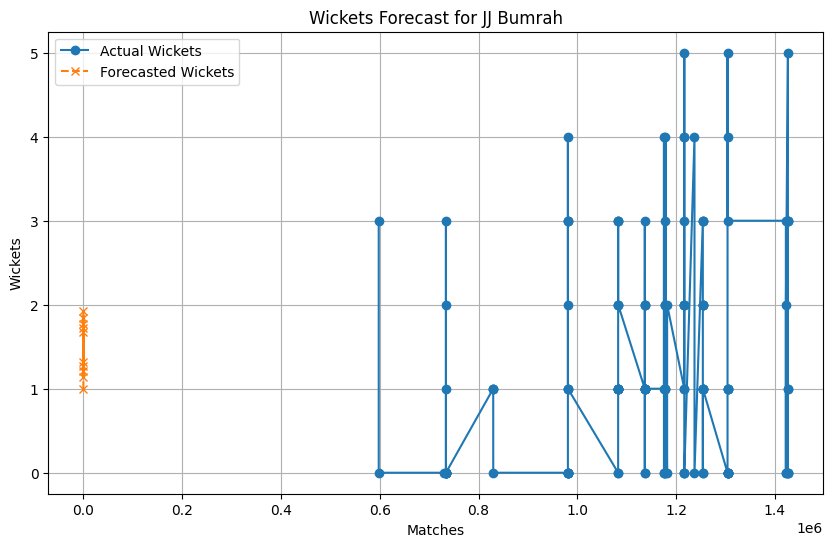

Forecasted wickets for JJ Bumrah in the next 10 matches:
133    0.997069
134    1.919465
135    1.140515
136    1.836433
137    1.212461
138    1.772049
139    1.270195
140    1.720272
141    1.316630
142    1.678627
Name: predicted_mean, dtype: float64


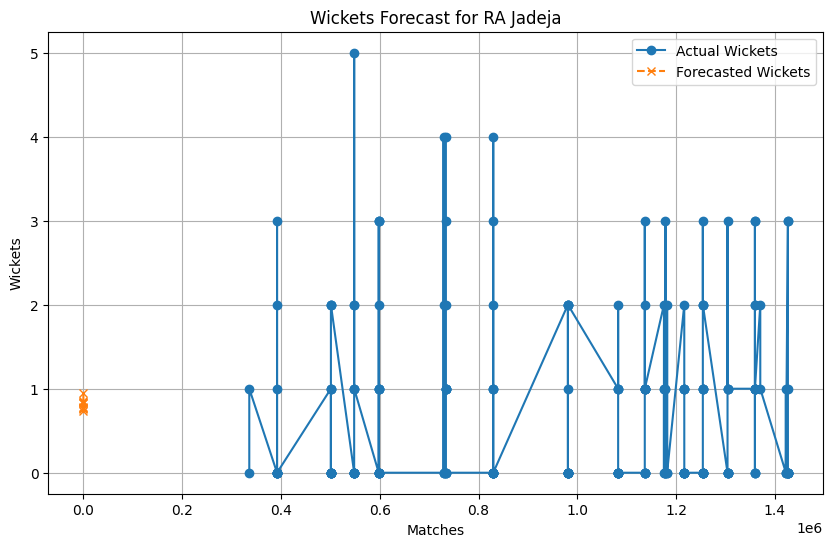

Forecasted wickets for RA Jadeja in the next 10 matches:
211    0.950512
212    0.729462
213    0.858578
214    0.753210
215    0.843794
216    0.765415
217    0.833286
218    0.774509
219    0.825411
220    0.781329
Name: predicted_mean, dtype: float64


In [150]:
for bowler_name in top_bowlers['bowler']:
    bowler_timeseries = performance[performance['bowler'] == bowler_name].set_index('match_id')['wickets']
    bowler_timeseries = bowler_timeseries.sort_index()

    # Train an ARIMA model
    try:
        model = ARIMA(bowler_timeseries, order=(2, 1, 2))
        model_fit = model.fit()
        forecast_steps = 10  # Forecast for the next 10 matches
        forecast = model_fit.forecast(steps=forecast_steps)

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(bowler_timeseries, label='Actual Wickets', marker='o')
        plt.plot(range(len(bowler_timeseries), len(bowler_timeseries) + forecast_steps),
                 forecast, label='Forecasted Wickets', marker='x', linestyle='--')
        plt.title(f'Wickets Forecast for {bowler_name}')
        plt.xlabel('Matches')
        plt.ylabel('Wickets')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Forecasted wickets for {bowler_name} in the next {forecast_steps} matches:")
        print(forecast)

    except Exception as e:
        print(f"Error processing {bowler_name}: {e}")

In [ ]:
bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
top_bowl=bowlers.sort_values(by="wickets",ascending=False)
top_bowlers=top_bowl.head(10)
top_bowlers

,bowler,wickets
524,YS Chahal,213
119,DJ Bravo,207
348,PP Chawla,201
446,SP Narine,200
355,R Ashwin,198
71,B Kumar,195
438,SL Malinga,188
8,A Mishra,183
193,JJ Bumrah,182
373,RA Jadeja,169


In [ ]:
for i in range(len(top_bowlers)):
  bowler=top_bowlers.iloc[i]["bowler"]
  print(bowler)
  bscore=performance[performance['bowler']==bowler]
  print(bscore)

YS Chahal
       match_id     bowler  wickets  runs_conceded
4236     598029  YS Chahal        0             35
4782     729281  YS Chahal        1             18
4816     729287  YS Chahal        2             17
4889     729299  YS Chahal        1             26
4923     729305  YS Chahal        1             17
...         ...        ...      ...            ...
12793   1426294  YS Chahal        1             48
12851   1426299  YS Chahal        1             22
12890   1426303  YS Chahal        2             31
12952   1426310  YS Chahal        1             43
12965   1426311  YS Chahal        0             34

[159 rows x 4 columns]
DJ Bravo
       match_id    bowler  wickets  runs_conceded
84       335989  DJ Bravo        0             37
110      335991  DJ Bravo        0             27
146      335994  DJ Bravo        0             31
182      335997  DJ Bravo        1             25
267      336004  DJ Bravo        1             29
...         ...       ...      ...           

For top 10 bowlers

In [ ]:

# Loop through top bowlers to predict and evaluate
for i in range(len(top_bowlers)):
    bowler = top_bowlers.iloc[i]["bowler"]
    print(f"Bowler: {bowler}")

    # Filter performance data for the bowler
    bscore = performance[performance['bowler'] == bowler]

    # Preparing data
    bscore["match_number"] = range(len(bscore))
    bscore.set_index("match_number", inplace=True)

    # Splitting into train and test sets
    train_size = int(len(bscore) * 0.8)  # 80% train, 20% test
    train, test = bscore["wickets"][:train_size], bscore["wickets"][train_size:]

    # Fitting the ARIMA model
    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()

    # Forecasting for test set
    test_forecast = model_fit.forecast(steps=len(test))

    # Forecasting beyond the dataset
    future_forecast = model_fit.forecast(steps=5)

    # Evaluation metrics
    mae = mean_absolute_error(test, test_forecast)
    mse = mean_squared_error(test, test_forecast)
    rmse = np.sqrt(mse)

    # results
    print("Future Forecasted Values (Next 5 Matches):")
    print(future_forecast)
    print("Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 50)


Bowler: YS Chahal
Future Forecasted Values (Next 5 Matches):
127    1.610157
128    1.622462
129    1.622438
130    1.622196
131    1.622358
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 1.09
Mean Squared Error (MSE): 1.62
Root Mean Squared Error (RMSE): 1.27
--------------------------------------------------
Bowler: DJ Bravo
Future Forecasted Values (Next 5 Matches):
126    0.835113
127    1.136975
128    1.219572
129    1.257388
130    1.263167
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 0.86
Mean Squared Error (MSE): 1.15
Root Mean Squared Error (RMSE): 1.07
--------------------------------------------------
Bowler: PP Chawla
Future Forecasted Values (Next 5 Matches):
152    1.015388
153    1.103004
154    0.903367
155    1.110538
156    0.906764
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 0.77
Mean Squared Error (MSE): 0.95
Root Mean Squared Error (RMSE): 0.98
-----